In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats
from IPython.display import display
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [92]:
hmeq=pd.read_csv(r"C:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\data\hmeq.csv")
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [93]:
missing_data_total = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values Total')
missing_data_total['Percentage Missing Total'] = (missing_data_total['Missing Values Total'] / len(hmeq)) * 100

# Calculer les valeurs manquantes pour BAD = 1
hmeq_bad_1 = hmeq[hmeq['BAD'] == 1]
missing_data_bad_1 = hmeq_bad_1.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values BAD = 1')
missing_data_bad_1['Percentage Missing BAD = 1'] = (missing_data_bad_1['Missing Values BAD = 1'] / len(hmeq_bad_1)) * 100

# Calculer les valeurs manquantes pour BAD = 0
hmeq_bad_0 = hmeq[hmeq['BAD'] == 0]
missing_data_bad_0 = hmeq_bad_0.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values BAD = 0')
missing_data_bad_0['Percentage Missing BAD = 0'] = (missing_data_bad_0['Missing Values BAD = 0'] / len(hmeq_bad_0)) * 100

missing_data_combined = missing_data_total.merge(missing_data_bad_1, on='Variables').merge(missing_data_bad_0, on='Variables')

missing_data_combined = missing_data_combined.sort_values(by='Percentage Missing Total', ascending=False)
missing_data_combined


,Variables,Missing Values Total,Percentage Missing Total,Missing Values BAD = 1,Percentage Missing BAD = 1,Missing Values BAD = 0,Percentage Missing BAD = 0
12,DEBTINC,1267,21.258389,786,66.105971,481,10.081744
7,DEROG,708,11.879195,87,7.317073,621,13.016139
8,DELINQ,580,9.731544,72,6.055509,508,10.647663
2,MORTDUE,518,8.691275,106,8.915055,412,8.635506
6,YOJ,515,8.640940,65,5.466779,450,9.431985
10,NINQ,510,8.557047,75,6.307822,435,9.117585
9,CLAGE,308,5.167785,78,6.560135,230,4.820792
5,JOB,279,4.681208,23,1.934399,256,5.365751
4,REASON,252,4.228188,48,4.037006,204,4.275833
11,CLNO,222,3.724832,53,4.457527,169,3.542234


In [94]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Supposons que 'hmeq' soit votre dataframe initial
# 1. Création des variables indicatrices pour suivre les valeurs manquantes (facultatif mais utile)
hmeq['DEBTINC_MISSING'] = np.where(hmeq['DEBTINC'].isnull(), 1, 0)
hmeq['DEROG_MISSING'] = np.where(hmeq['DEROG'].isnull(), 1, 0)
hmeq['DELINQ_MISSING'] = np.where(hmeq['DELINQ'].isnull(), 1, 0)
hmeq['MORTDUE_MISSING'] = np.where(hmeq['MORTDUE'].isnull(), 1, 0)
hmeq['YOJ_MISSING'] = np.where(hmeq['YOJ'].isnull(), 1, 0)
hmeq['NINQ_MISSING'] = np.where(hmeq['NINQ'].isnull(), 1, 0)
hmeq['CLAGE_MISSING'] = np.where(hmeq['CLAGE'].isnull(), 1, 0)
hmeq['REASON_MISSING'] = np.where(hmeq['REASON'].isnull(), 1, 0)
hmeq['JOB_MISSING'] = np.where(hmeq['JOB'].isnull(), 1, 0)

# 2. Imputation par la médiane pour les variables numériques
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

imputer_median = SimpleImputer(strategy='median')
hmeq[numeric_columns] = imputer_median.fit_transform(hmeq[numeric_columns])

# 3. Imputation par la valeur modale pour les variables catégorielles
categorical_columns = ['REASON', 'JOB']

imputer_mode = SimpleImputer(strategy='most_frequent')
hmeq[categorical_columns] = imputer_mode.fit_transform(hmeq[categorical_columns])

# 4. Vérification que toutes les valeurs manquantes ont été imputées
print("Vérification des valeurs manquantes après imputation :")
print(hmeq.isnull().sum())


Vérification des valeurs manquantes après imputation :
BAD                0
LOAN               0
MORTDUE            0
VALUE              0
REASON             0
JOB                0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
DEBTINC_MISSING    0
DEROG_MISSING      0
DELINQ_MISSING     0
MORTDUE_MISSING    0
YOJ_MISSING        0
NINQ_MISSING       0
CLAGE_MISSING      0
REASON_MISSING     0
JOB_MISSING        0
dtype: int64


In [95]:
# Transformation logarithmique sur les variables avec une asymétrie importante
hmeq['LOG_LOAN'] = np.log1p(hmeq['LOAN'])  # log1p pour éviter log(0)
hmeq['LOG_MORTDUE'] = np.log1p(hmeq['MORTDUE'])
hmeq['LOG_VALUE'] = np.log1p(hmeq['VALUE'])
hmeq['LOG_DEBTINC'] = np.log1p(hmeq['DEBTINC'])
hmeq['LOG_DEROG'] = np.log1p(hmeq['DEROG'])
hmeq['LOG_DELINQ'] = np.log1p(hmeq['DELINQ'])


In [96]:
# One-Hot Encoding pour les variables catégorielles
hmeq_encoded = pd.get_dummies(hmeq, columns=['REASON', 'JOB'], drop_first=True)


In [97]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les variables continues pour le scaling
numeric_columns_to_scale = ['LOG_LOAN', 'LOG_MORTDUE', 'LOG_VALUE', 'LOG_DEBTINC', 
                            'LOG_DEROG', 'LOG_DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'YOJ']

# Appliquer le StandardScaler
scaler = StandardScaler()
hmeq_encoded[numeric_columns_to_scale] = scaler.fit_transform(hmeq_encoded[numeric_columns_to_scale])


In [78]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Séparer les variables explicatives (X) et la cible (y)
X = hmeq_encoded.drop(columns=['BAD'])
y = hmeq_encoded['BAD']

# 2. Diviser les données en ensemble d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Appliquer SMOTE pour rééquilibrer les classes dans le jeu d'entraînement
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Entraîner le modèle de régression logistique sur les données rééquilibrées
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)

# 5. Faire des prédictions sur le jeu de test
y_pred_smote = log_reg_smote.predict(X_test)

# 6. Évaluer le modèle
print("Matrice de confusion avec SMOTE :\n", confusion_matrix(y_test, y_pred_smote))
print("Classification report avec SMOTE :\n", classification_report(y_test, y_pred_smote))

# 7. Calculer l'AUC avec SMOTE
y_prob_smote = log_reg_smote.predict_proba(X_test)[:, 1]
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)
print(f"AUC avec SMOTE : {roc_auc_smote}")


Matrice de confusion avec SMOTE :
 [[1143  246]
 [ 105  294]]
Classification report avec SMOTE :
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1389
           1       0.54      0.74      0.63       399

    accuracy                           0.80      1788
   macro avg       0.73      0.78      0.75      1788
weighted avg       0.83      0.80      0.81      1788

AUC avec SMOTE : 0.8564932850484743


C:\Users\chemm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
# Séparer la variable cible (BAD) des variables explicatives
X = hmeq_encoded.drop(columns=['BAD'])
y = hmeq_encoded['BAD']


In [75]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entraîner un modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Évaluation du modèle
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("Classification report :\n", classification_report(y_test, y_pred))

# Calculer l'AUC
y_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC : {roc_auc}")


Matrice de confusion :
 [[1336   53]
 [ 188  211]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1389
           1       0.80      0.53      0.64       399

    accuracy                           0.87      1788
   macro avg       0.84      0.75      0.78      1788
weighted avg       0.86      0.87      0.85      1788

AUC : 0.8846811052108311


C:\Users\chemm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# Ajuster le seuil de décision à 0.4
threshold = 0.4
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Réévaluation avec le nouveau seuil
print("Matrice de confusion avec seuil ajusté :\n", confusion_matrix(y_test, y_pred_adjusted))
print("Classification report avec seuil ajusté :\n", classification_report(y_test, y_pred_adjusted))


Matrice de confusion avec seuil ajusté :
 [[1298   91]
 [ 150  249]]
Classification report avec seuil ajusté :
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1389
           1       0.73      0.62      0.67       399

    accuracy                           0.87      1788
   macro avg       0.81      0.78      0.79      1788
weighted avg       0.86      0.87      0.86      1788



In [79]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Séparer les variables explicatives (X) et la cible (y)
X = hmeq_encoded.drop(columns=['BAD'])
y = hmeq_encoded['BAD']

# 2. Diviser les données en ensemble d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Appliquer ADASYN pour rééquilibrer les classes dans le jeu d'entraînement
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

# 4. Entraîner le modèle de régression logistique sur les données rééquilibrées avec ADASYN
log_reg_ada = LogisticRegression(max_iter=1000)
log_reg_ada.fit(X_train_ada, y_train_ada)

# 5. Faire des prédictions sur l'ensemble de test
y_pred_ada = log_reg_ada.predict(X_test)

# 6. Évaluer le modèle
print("Matrice de confusion avec ADASYN :\n", confusion_matrix(y_test, y_pred_ada))
print("Classification report avec ADASYN :\n", classification_report(y_test, y_pred_ada))

# 7. Calculer l'AUC avec ADASYN
y_prob_ada = log_reg_ada.predict_proba(X_test)[:, 1]
roc_auc_ada = roc_auc_score(y_test, y_prob_ada)
print(f"AUC avec ADASYN : {roc_auc_ada}")


Matrice de confusion avec ADASYN :
 [[1142  247]
 [ 108  291]]
Classification report avec ADASYN :
               precision    recall  f1-score   support

           0       0.91      0.82      0.87      1389
           1       0.54      0.73      0.62       399

    accuracy                           0.80      1788
   macro avg       0.73      0.78      0.74      1788
weighted avg       0.83      0.80      0.81      1788

AUC avec ADASYN : 0.8521772393546864


C:\Users\chemm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
# Liste des colonnes à exclure (les variables originales transformées en LOG)
columns_to_exclude = ['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC', 'DEROG', 'DELINQ']

# Créer un nouveau DataFrame sans ces colonnes
X_filtered = X_encoded.drop(columns=columns_to_exclude)

# Vérification que les colonnes ont bien été exclues
print(X_filtered.columns)


Index(['YOJ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC_MISSING', 'DEROG_MISSING',
       'DELINQ_MISSING', 'MORTDUE_MISSING', 'YOJ_MISSING', 'NINQ_MISSING',
       'CLAGE_MISSING', 'REASON_MISSING', 'JOB_MISSING', 'LOG_LOAN',
       'LOG_MORTDUE', 'LOG_VALUE', 'LOG_DEBTINC', 'LOG_DEROG', 'LOG_DELINQ',
       'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales',
       'JOB_Self'],
      dtype='object')


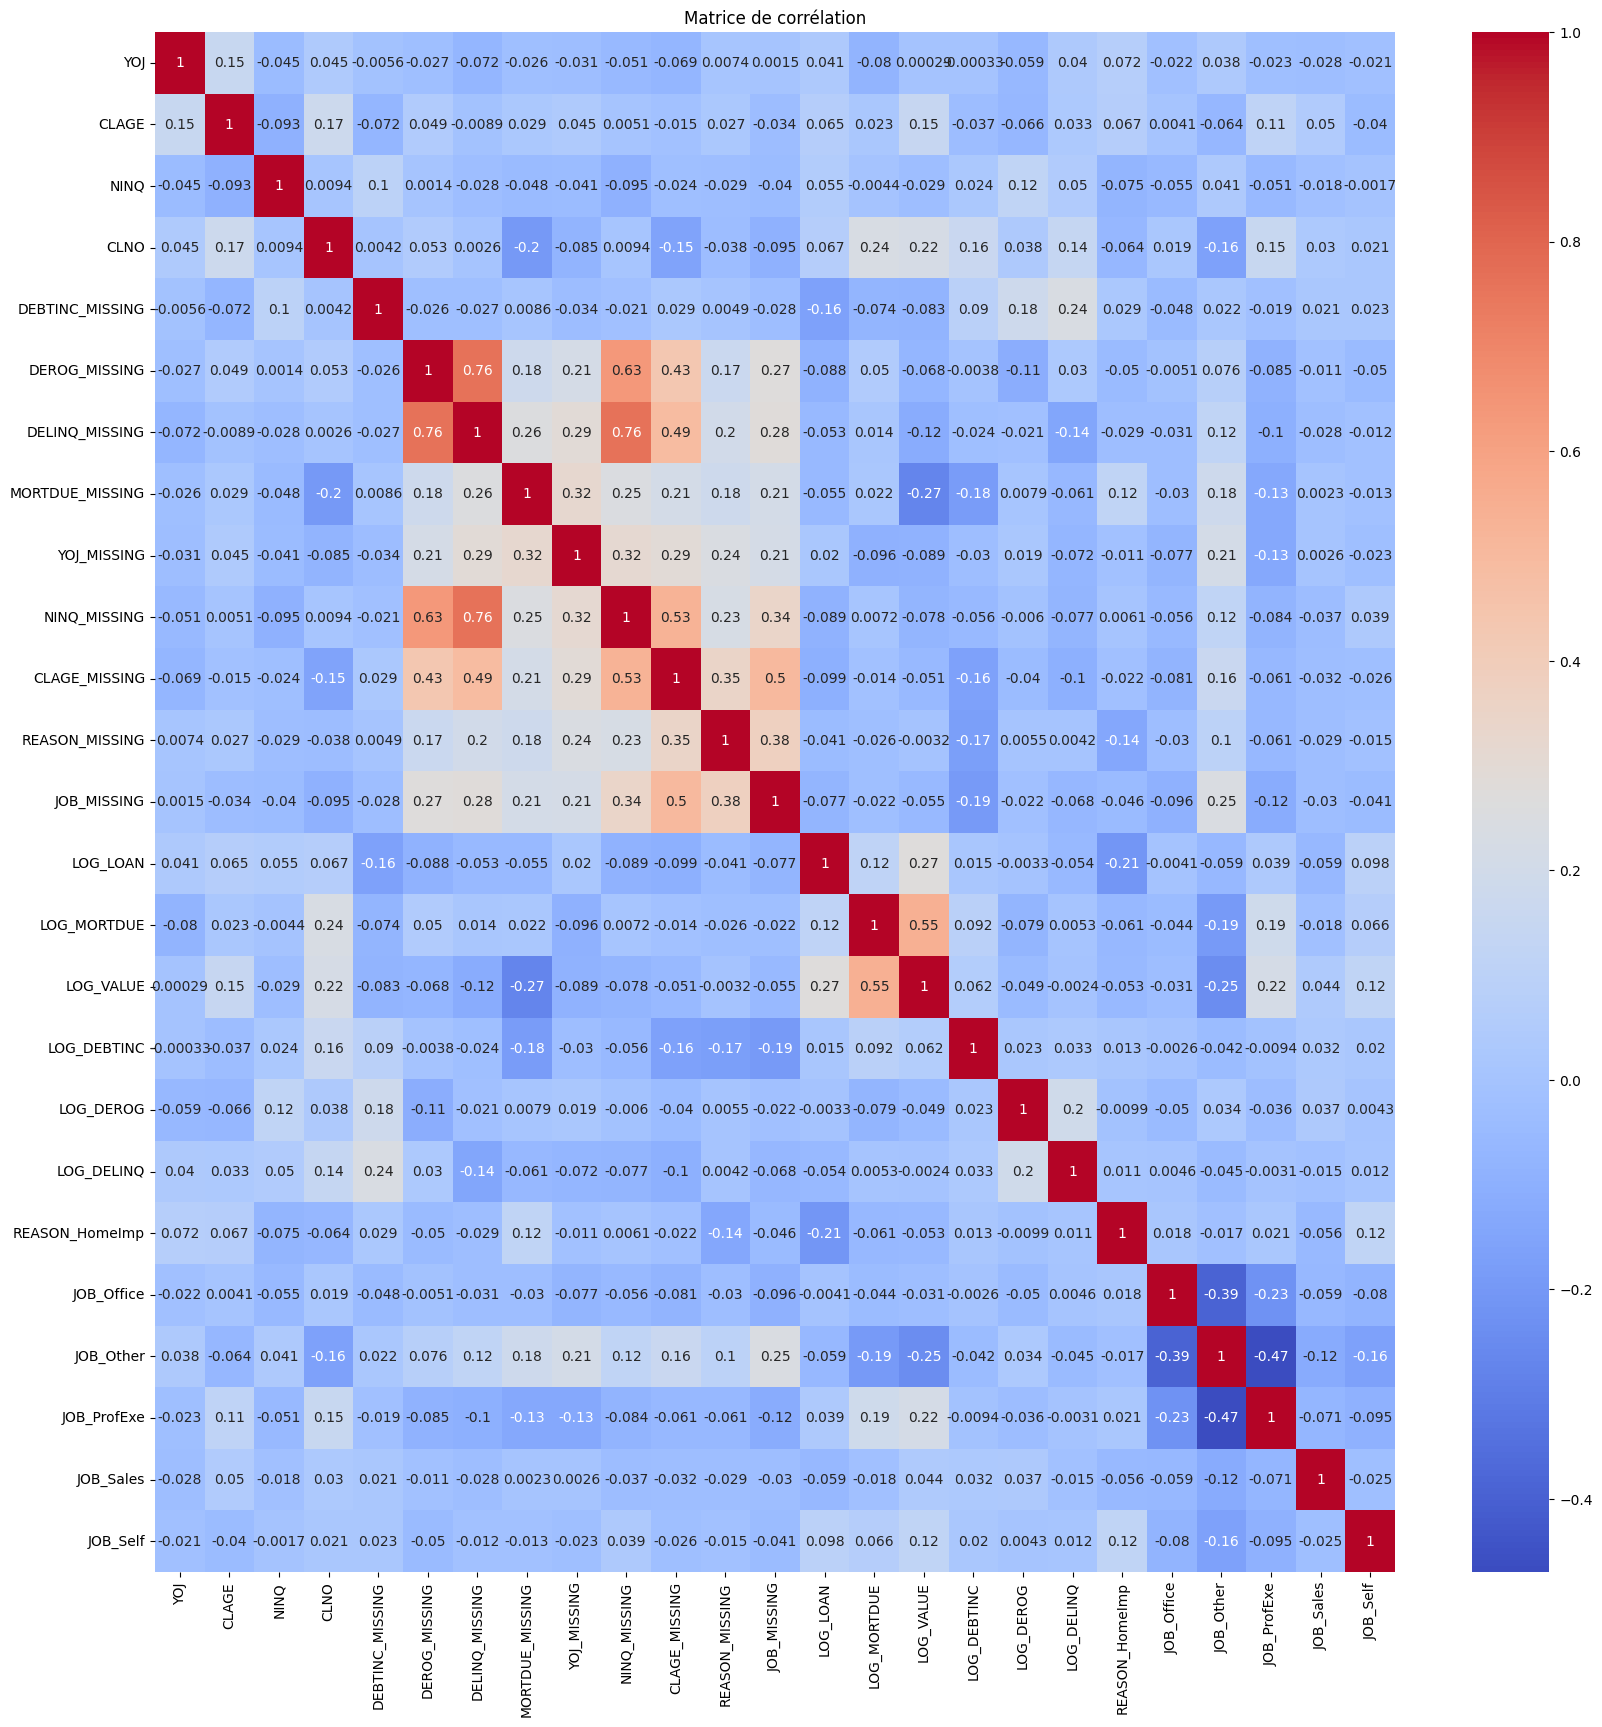

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = X_filtered.corr()

# Affichage de la heatmap de corrélation
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcul du VIF pour chaque variable restante
vif_data = pd.DataFrame()
vif_data['Feature'] = X_filtered.columns
vif_data['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Affichage des résultats
print(vif_data)


            Feature       VIF
0               YOJ  1.071735
1             CLAGE  1.141267
2              NINQ  1.149899
3              CLNO  1.247088
4   DEBTINC_MISSING  1.436097
5     DEROG_MISSING  3.092717
6    DELINQ_MISSING  4.250410
7   MORTDUE_MISSING  1.605426
8       YOJ_MISSING  1.423105
9      NINQ_MISSING  3.042281
10    CLAGE_MISSING  1.965828
11   REASON_MISSING  1.358567
12      JOB_MISSING  1.599593
13         LOG_LOAN  1.228465
14      LOG_MORTDUE  1.688365
15        LOG_VALUE  1.864891
16      LOG_DEBTINC  1.167324
17        LOG_DEROG  1.236607
18       LOG_DELINQ  1.435821
19   REASON_HomeImp  1.600968
20       JOB_Office  1.164165
21        JOB_Other  1.724991
22      JOB_ProfExe  1.282746
23        JOB_Sales  1.038489
24         JOB_Self  1.129725


In [88]:
# Liste des colonnes à exclure (la variable cible et les variables que vous ne souhaitez pas utiliser)
columns_to_exclude = 

# Créer X_encoded en excluant ces colonnes
X_encoded = hmeq.drop(columns=columns_to_exclude)

# Vérifier les colonnes de X_encoded
print(X_encoded.columns)


Index(['REASON', 'JOB', 'YOJ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC_MISSING',
       'DEROG_MISSING', 'DELINQ_MISSING', 'MORTDUE_MISSING', 'YOJ_MISSING',
       'NINQ_MISSING', 'CLAGE_MISSING', 'REASON_MISSING', 'JOB_MISSING',
       'LOG_LOAN', 'LOG_MORTDUE', 'LOG_VALUE', 'LOG_DEBTINC', 'LOG_DEROG',
       'LOG_DELINQ'],
      dtype='object')


In [89]:
# Appliquer One-Hot Encoding aux variables catégorielles (si besoin)
X_encoded = pd.get_dummies(X_encoded, drop_first=True)

# Vérifier que toutes les colonnes sont bien numériques après encodage
print(X_encoded.dtypes)


YOJ                float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC_MISSING      int64
DEROG_MISSING        int64
DELINQ_MISSING       int64
MORTDUE_MISSING      int64
YOJ_MISSING          int64
NINQ_MISSING         int64
CLAGE_MISSING        int64
REASON_MISSING       int64
JOB_MISSING          int64
LOG_LOAN           float64
LOG_MORTDUE        float64
LOG_VALUE          float64
LOG_DEBTINC        float64
LOG_DEROG          float64
LOG_DELINQ         float64
REASON_HomeImp        bool
JOB_Office            bool
JOB_Other             bool
JOB_ProfExe           bool
JOB_Sales             bool
JOB_Self              bool
dtype: object


In [100]:
# Utiliser les 10 premières composantes principales
X_pca_selected = X_pca[:, :10]  # Garder les 10 premières composantes

# Entraîner un modèle de régression logistique avec les composantes principales sélectionnées
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_pca_selected, y_train)

# Prédictions sur le jeu de test
y_pred_pca = log_reg_pca.predict(pca.transform(X_test)[:, :10])  # Appliquer les 10 premières composantes sur le test

# Évaluation du modèle
print(classification_report(y_test, y_pred_pca))


NameError: name 'X_pca' is not defined